In [5]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.1 MB/s eta 0:00:00a 0:00:01


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("Project Management Dataset.csv")

# Corrigir nomes das colunas (remover espaços)
df.columns = df.columns.str.strip()

df.head()

,Project Name,Project Description,Project Type,Project Manager,Region,Department,Project Cost,Project Benefit,Complexity,Status,Completion%,Phase,Year,Month,Start Date,End Date
0,Rhinestone,Associations Now Is A Casual Game To Teach You...,INCOME GENERATION,Yael Wilcox,North,Admin & BI,"3,648,615.00","8,443,980.00",High,In - Progress,77%,Phase 4 - Implement,2021,2,2/1/2021,6/1/2021
1,A Triumph Of Softwares,Is A Fully Managed Content Marketing Software ...,INCOME GENERATION,Brenda Chandler,West,eCommerce,"4,018,835.00","9,012,225.00",High,Cancelled,80%,Phase 2 - Develop,2021,3,3/1/2021,6/1/2021
2,The Blue Bird,Most Content Marketers Know The Golden Rule: Y...,INCOME GENERATION,Nyasia Hunter,North,Warehouse,"4,285,483.00","9,078,339.00",High,Completed,100%,Phase 4 - Implement,2021,3,3/1/2021,6/1/2021
3,Remembering Our Ancestors,"Utilize And Utilizes (Verb Form) The Open, Inc...",PROCESS IMPROVEMENT,Brenda Chandler,East,Sales and Marketing,"5,285,864.00","8,719,006.00",High,Cancelled,75%,Phase 5 - Measure,2021,3,3/1/2021,6/1/2021
4,Skyhawks,Is A Solution For Founders Who Want To Win At ...,WORKING CAPITAL IMPROVEMENT,Jaylyn Mckenzie,East,eCommerce,"5,785,601.00","8,630,148.00",High,Completed,100%,Phase 1 - Explore,2021,3,3/1/2021,6/1/2021


In [10]:
# Limpeza de dados
df["Completion%"] = df["Completion%"].str.replace('%', '').astype(float)
df["Project Cost"] = df["Project Cost"].str.replace(',', '').astype(float)
df["Project Benefit"] = df["Project Benefit"].str.replace(',', '').astype(float)

# Criar nova variável: ROI
df["ROI"] = (df["Project Benefit"] - df["Project Cost"]) / df["Project Cost"]

# Configurações de visualização
sns.set(style="whitegrid")

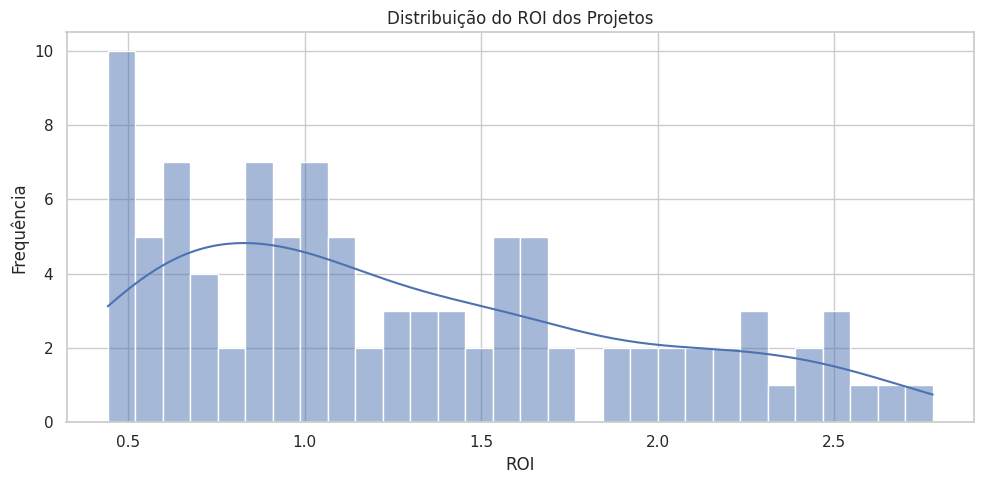

In [11]:

# 1. Histograma do ROI
plt.figure(figsize=(10, 5))
sns.histplot(df["ROI"], bins=30, kde=True)
plt.title("Distribuição do ROI dos Projetos")
plt.xlabel("ROI")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()



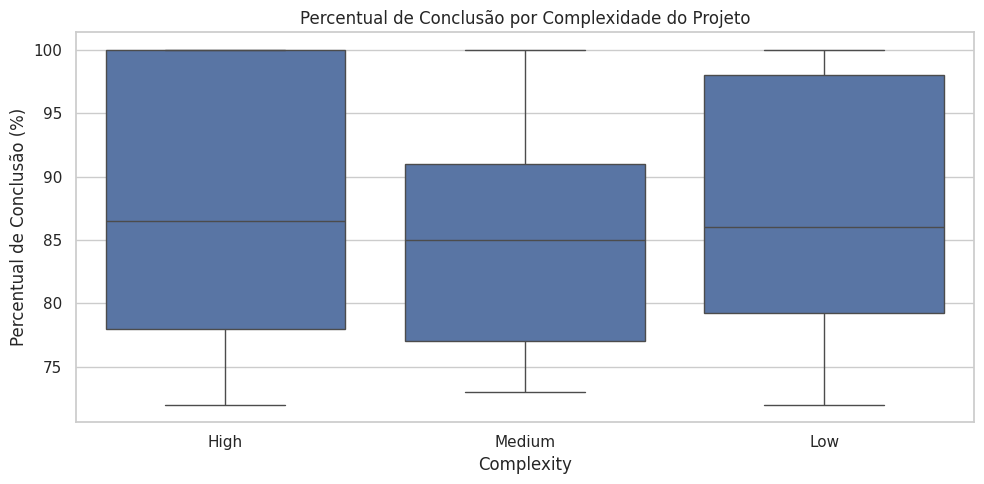

In [12]:
# 2. Boxplot do Completion% por Complexidade
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Complexity", y="Completion%")
plt.title("Percentual de Conclusão por Complexidade do Projeto")
plt.ylabel("Percentual de Conclusão (%)")
plt.tight_layout()
plt.show()


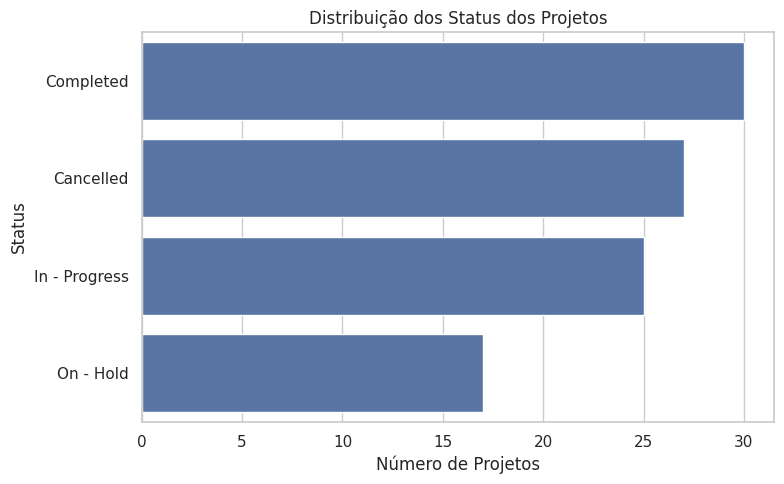

In [13]:

# 3. Contagem de Status dos Projetos
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="Status", order=df["Status"].value_counts().index)
plt.title("Distribuição dos Status dos Projetos")
plt.xlabel("Número de Projetos")
plt.tight_layout()
plt.show()


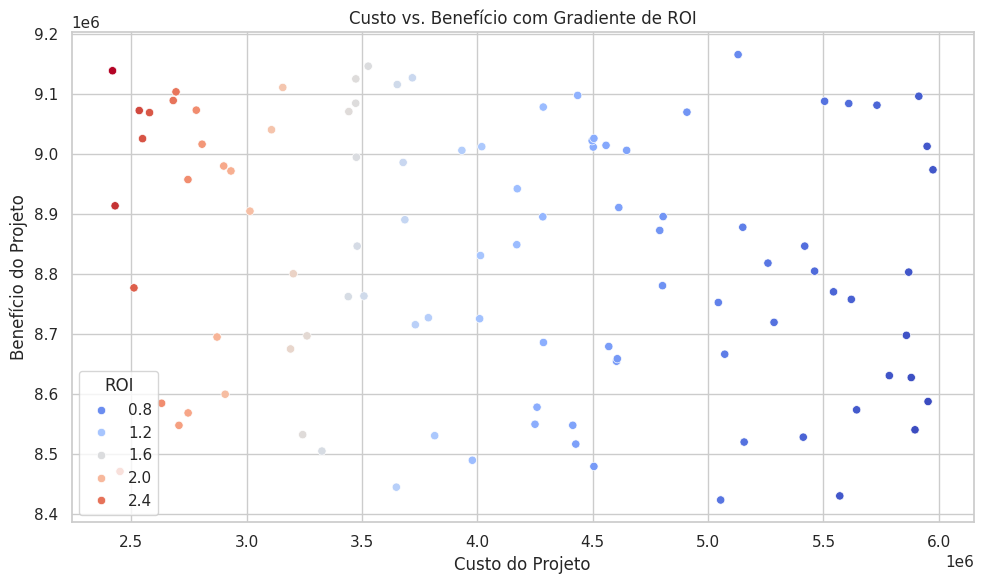

In [14]:

# 4. Relação entre Custo e Benefício com ROI como cor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Project Cost", y="Project Benefit", hue="ROI", palette="coolwarm")
plt.title("Custo vs. Benefício com Gradiente de ROI")
plt.xlabel("Custo do Projeto")
plt.ylabel("Benefício do Projeto")
plt.tight_layout()
plt.show()
